# Разделитьная кластеризация
## Елисеев Е.В.

### Задание

Разработайте программу, которая выполняет кластеризацию заданного набора данных <br>
с помощью алгоритмов k‑Means и k-Medoids. Параметрами программы являются набор данных <br>
 и число кластеров. Программа должна выдавать координаты точек и назначенные им кластера, <br>
  а также значение ошибки кластеризации.
Проведите эксперименты на наборе данных customers (сведения о клиентах банка: скачать  <br>
zip-архив с данными в формате CSV и описанием).  <br>
Выполните визуализацию полученных результатов в следующем виде: <br>
- точечный график, на котором цвет точки отражает принадлежность кластеру;
- зависимость ошибки кластеризации от параметра k. <br>

Доработайте программу, добавив в список ее параметров долю зашумленных объектов <br>
 набора. Дополнительно к ранее реализованным функциям программа должна вносить шум  <br>
 в набор данных: случайным образом изменить заданную долю объектов набора (изменение  <br>
 может заключаться в добавлении/вычитании случайного числа к/из одной/нескольких координат объекта). <br>
Проведите эксперименты на ранее выбранных наборах данных, варьируя долю зашумленных объектов (1%, 3%, 5%, 10%) и <br>
 используя различные значения параметра  (из интервала 3..9). <br>
Выполните визуализацию полученных результатов указанным выше способом. <br>
Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. <br>
 Отчет должен представлять собой связный и структурированный документ со следующими разделами:   <br>
формулировка задания; 
- гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами; 
- рисунки с результатами визуализации; 
- пояснения, раскрывающие смысл полученных результатов.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


data = pd.read_csv('customers.csv')
data

,Row,CustomerId,Age,Education,YearsEmployed,Income,CardDebt,OtherDebt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [2]:
data = data.drop(columns=['CustomerId', 'Row'])

In [3]:
data.isnull().sum()

Age                  0
Education            0
YearsEmployed        0
Income               0
CardDebt             0
OtherDebt            0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

1 вариант - заполняем пропуски алгоритмом классификации

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Разделяем данные на строки, где 'Defaulted' пропущено, и где нет
train_data = data[data['Defaulted'].notna()]
test_data = data[data['Defaulted'].isna()]

# Создаем экземпляр RandomForestClassifier
clf = RandomForestClassifier()

# Обучаем модель
clf.fit(train_data.drop('Defaulted', axis=1), train_data['Defaulted'])

# Предсказываем пропущенные значения
test_data['Defaulted'] = clf.predict(test_data.drop('Defaulted', axis=1))

# Объединяем данные обратно в один DataFrame
clean_data_1 = pd.concat([train_data, test_data])
clean_data_1

C:\Users\santiperro\AppData\Local\Temp\ipykernel_11164\1340741210.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Defaulted'] = clf.predict(test_data.drop('Defaulted', axis=1))


,Age,Education,YearsEmployed,Income,CardDebt,OtherDebt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
818,35,2,0,35,2.383,1.957,1.0,12.4
820,37,1,4,24,0.419,2.989,0.0,14.2
825,32,2,12,116,4.027,2.585,0.0,5.7
835,21,3,0,41,2.367,5.628,1.0,19.5


In [5]:
clean_data_1['Defaulted'].isnull().sum()

0

2 вариант - заполняем пустые значения нулями

In [6]:
clean_data_2 = data.copy()
clean_data_2.loc[clean_data_2['Defaulted'].isnull()] = 0

In [7]:
clean_data_2.isnull().sum()

Age                0
Education          0
YearsEmployed      0
Income             0
CardDebt           0
OtherDebt          0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

# стандартизация данных с пропусками в Defaulted заполненынными классификацией
std_scaler_1 = StandardScaler()
data_std_1 = std_scaler_1.fit_transform(clean_data_1)
scaled_data_1 = pd.DataFrame(data_std_1, index=data.index, columns=clean_data_1.columns)

# стандартизация данных с заполненным Defaulted заполненными нулями
std_scaler_2 = StandardScaler()
data_std_2 = std_scaler_2.fit_transform(clean_data_2)
scaled_data_2 = pd.DataFrame(data_std_2, index=data.index, columns=clean_data_2.columns)
scaled_data_2

,Age,Education,YearsEmployed,Income,CardDebt,OtherDebt,Defaulted,DebtIncomeRatio
0,0.811905,0.544350,-0.132932,-0.492942,-0.575052,-0.451565,-0.523797,-0.293567
1,1.208221,-0.392285,2.794319,1.659051,1.643717,1.780466,-0.523797,0.594010
2,0.283483,0.544350,0.452519,0.516635,2.404708,1.025730,1.909138,1.700067
3,0.019272,0.544350,-0.425657,-0.492942,-0.297830,-0.625566,-0.523797,-0.293567
4,1.208221,-0.392285,3.526132,5.723926,3.995872,1.996015,-0.523797,-0.170672
...,...,...,...,...,...,...,...,...
845,-1.896258,-1.328919,-1.011107,-0.997731,-0.636767,-0.786760,-0.523797,-1.153833
846,-0.046781,0.544350,0.013431,-0.094425,-0.458091,-0.155419,-0.523797,-0.197982
847,-0.244939,2.417619,-1.011107,-0.519510,0.757802,0.216014,1.909138,3.406944
848,0.217430,-0.392285,0.745244,-0.253832,-0.579034,-0.569336,-0.523797,-0.757838


In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import numpy as np


def cluster_data(data, n_clusters, method:str = 'kmeans'):
    data_with_claster = data.copy()
    
    if method == 'kmeans':
        clasters = KMeans(n_clusters=n_clusters, random_state=37).fit(data)
    else:
        clasters = KMedoids(n_clusters=n_clusters, random_state=37).fit(data)

    labels = clasters.labels_
    error = silhouette_score(data, labels)
    
    data_with_claster['claster'] = labels
    
    return data_with_claster, error

def visualize_clasters(data):
    color_dict = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'cyan',
    4: 'magenta',
    5: 'yellow',
    6: 'black',
    7: 'purple',
    8: 'pink',
    9: 'brown',
    10: 'orange'
    }
    y = data['claster']
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data.drop(columns='claster'))
    plt.figure(figsize=(8, 6))
    for i, claster in enumerate(data['claster'].unique()):
        plt.scatter(X_pca[y==claster, 0], X_pca[y==claster, 1], color=color_dict[i], alpha=0.5, label=f'claster {i + 1}')
    plt.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
def visualize_k_by_error(data:pd.DataFrame, method:str = 'kmeans'):
    k_list = [x for x in range(2, 10)]
    errors = []
    for k in k_list:
        _, error = cluster_data(data, k, method)
        errors.append(error)
        
    plt.figure(figsize=(16, 9))
    plt.plot(k_list, errors)
    plt.title('Зависимость ошибки кластеризации от числа кластеров')
    plt.ylabel('Ошибка')
    plt.xlabel('Число кластеров')
    plt.grid(True)
    plt.show()

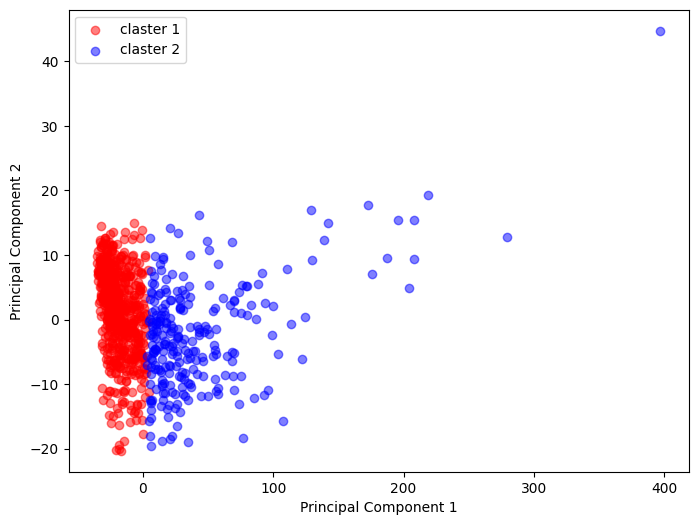

Ошибка: 0.5287394553355181


In [10]:
# Нестандартизированные данные с заполнением с помощью классификации
clasters, error = cluster_data(clean_data_1, 2, method='kmedoids')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

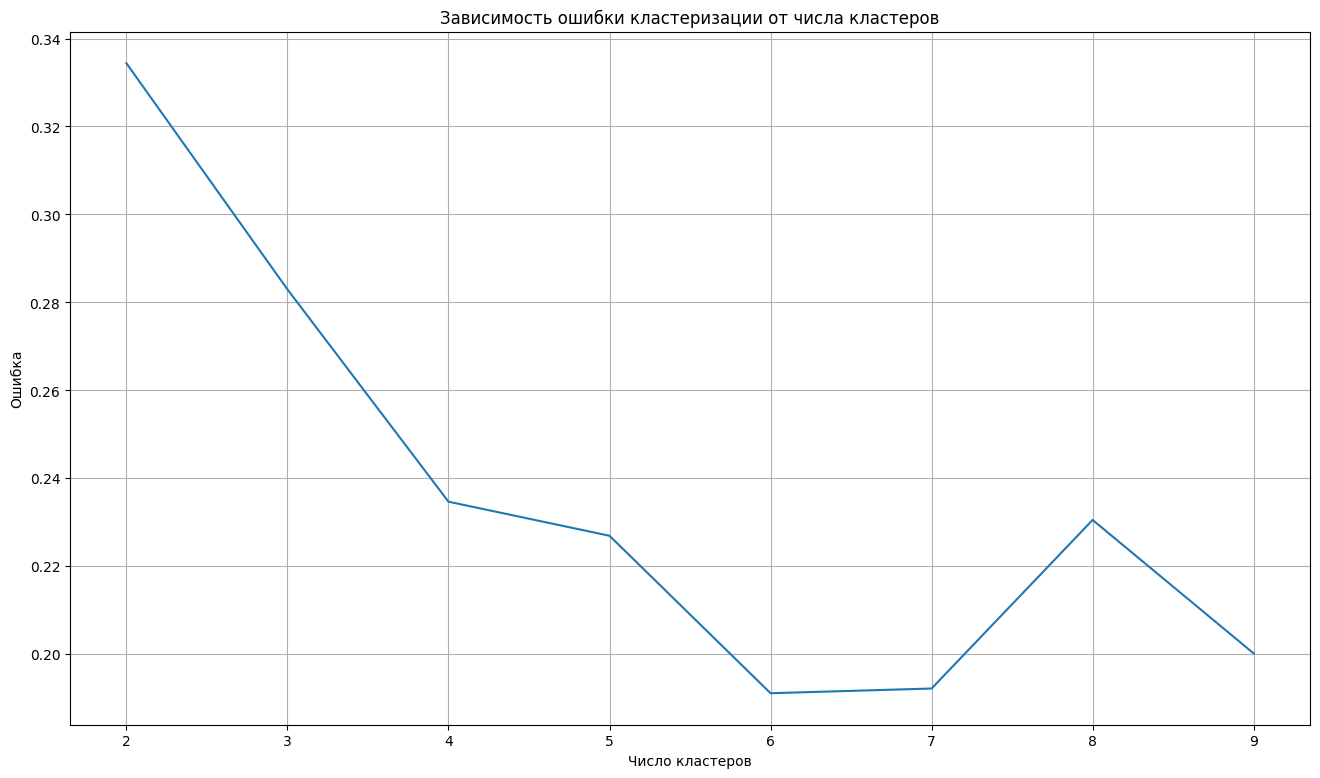

In [17]:
visualize_k_by_error(scaled_data_2, 'kmeans')

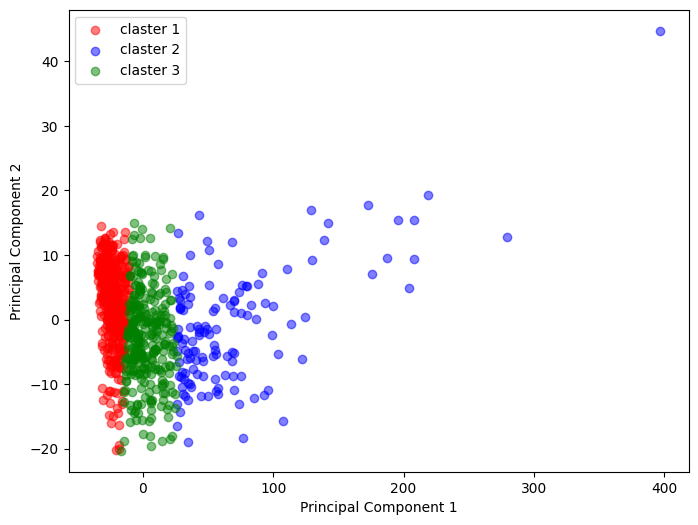

Ошибка: 0.3587672521248303


In [19]:
clasters, error = cluster_data(clean_data_1, 3, method='kmedoids')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

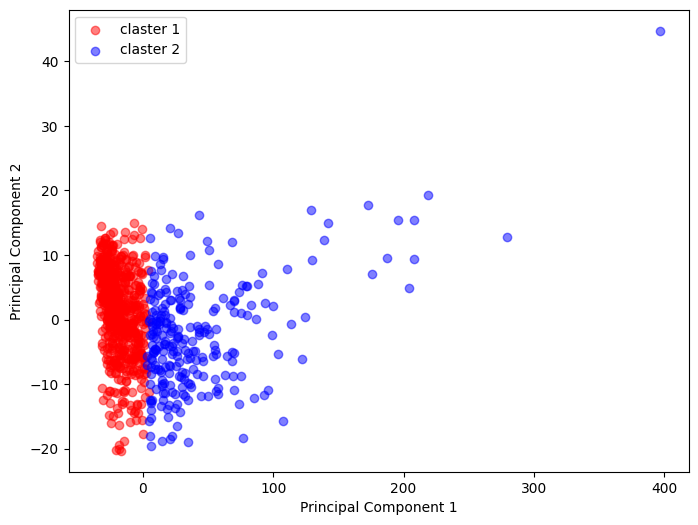

Ошибка: 0.5287396274911619


In [30]:
clasters, error = cluster_data(clean_data_1, 2, method='kmeans')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

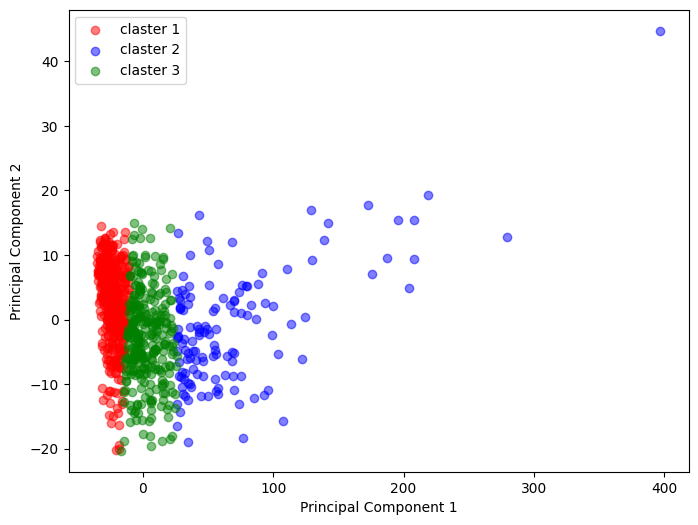

Ошибка: 0.3587672521248303


In [31]:
clasters, error = cluster_data(clean_data_1, 3, method='kmeans')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

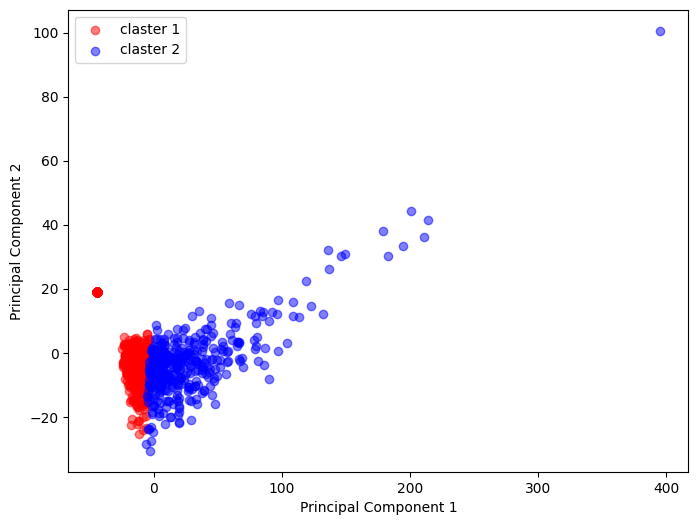

Ошибка: 0.38622925410442216


In [20]:
# Нестандартизированные данные с заполнением пустых значений нулями
clasters, error = cluster_data(clean_data_2, 2, method='kmedoids')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

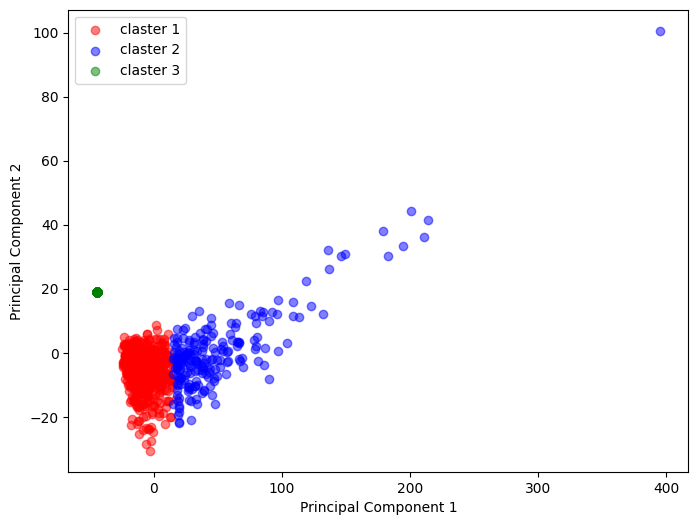

Ошибка: 0.541550071486601


In [21]:
clasters, error = cluster_data(clean_data_2, 3, method='kmedoids')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

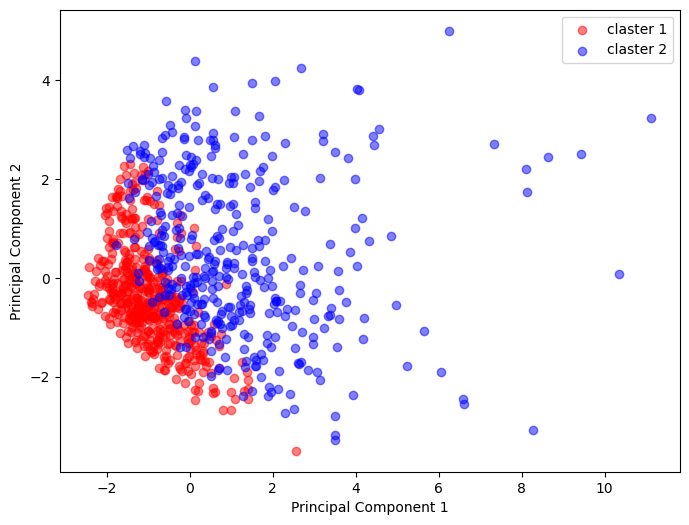

Ошибка: 0.19796481034438926


In [22]:
# Cтандартизированные данные с заполнением с помощью классификации
clasters, error = cluster_data(scaled_data_1, 2, method='kmedoids')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

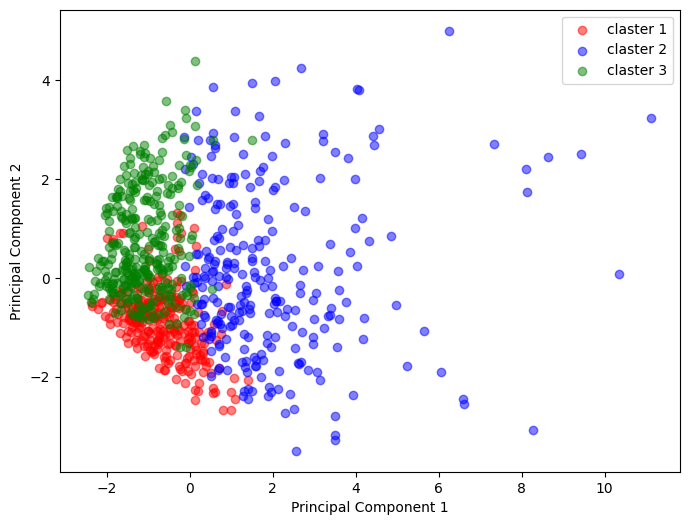

Ошибка: 0.11344538426744928


In [23]:
clasters, error = cluster_data(scaled_data_1, 3, method='kmedoids')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

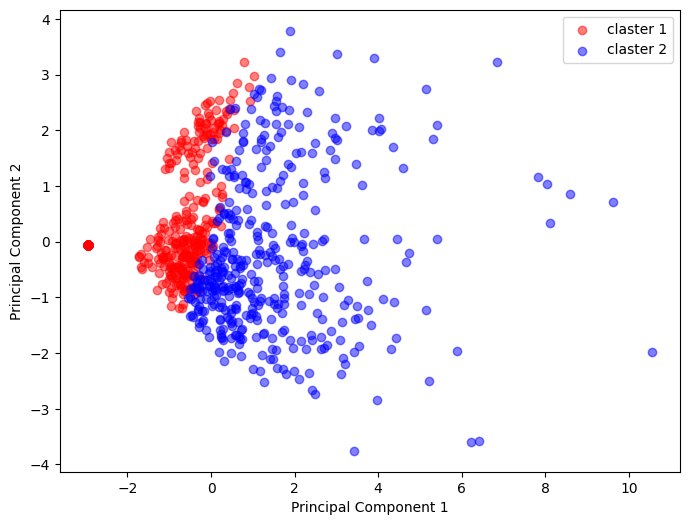

Ошибка: 0.23812893436805352


In [24]:
# Cтандартизированные данные с заполнением пустых значений нулями
clasters, error = cluster_data(scaled_data_2, 2, method='kmedoids')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

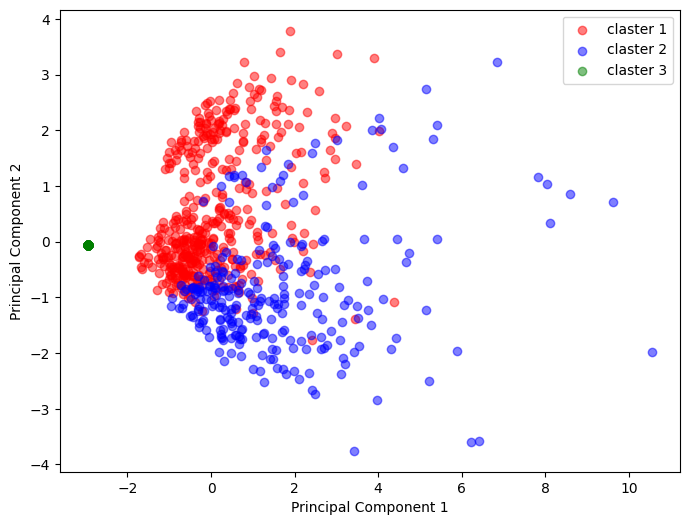

Ошибка: 0.30124055181177667


In [28]:
clasters, error = cluster_data(scaled_data_2, 3, method='kmedoids')
visualize_clasters(clasters)
print(f'Ошибка: {error}')